In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy
import numpy
from sklearn import datasets, linear_model, metrics

In [2]:
b = pd.DataFrame.from_csv('../data/raw/blood_train.csv')

In [3]:
b[:5]

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
619,2,50,12500,98,1
664,0,13,3250,28,1
441,1,16,4000,35,1
160,2,20,5000,45,1
358,1,24,6000,77,0


In [4]:
b.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347,0.239583
std,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.000000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,49.250000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


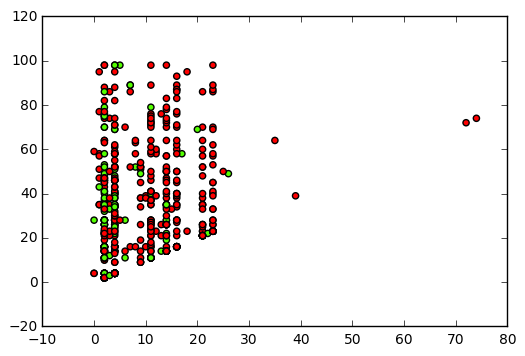

In [44]:
#saving this to remember how to plot inline
%matplotlib inline
plt.scatter(x=b['Months since Last Donation'], y=b['Months since First Donation'], c=b['Made Donation in March 2007'], cmap='prism') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x106d9b610>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1074ee350>]], dtype=object)

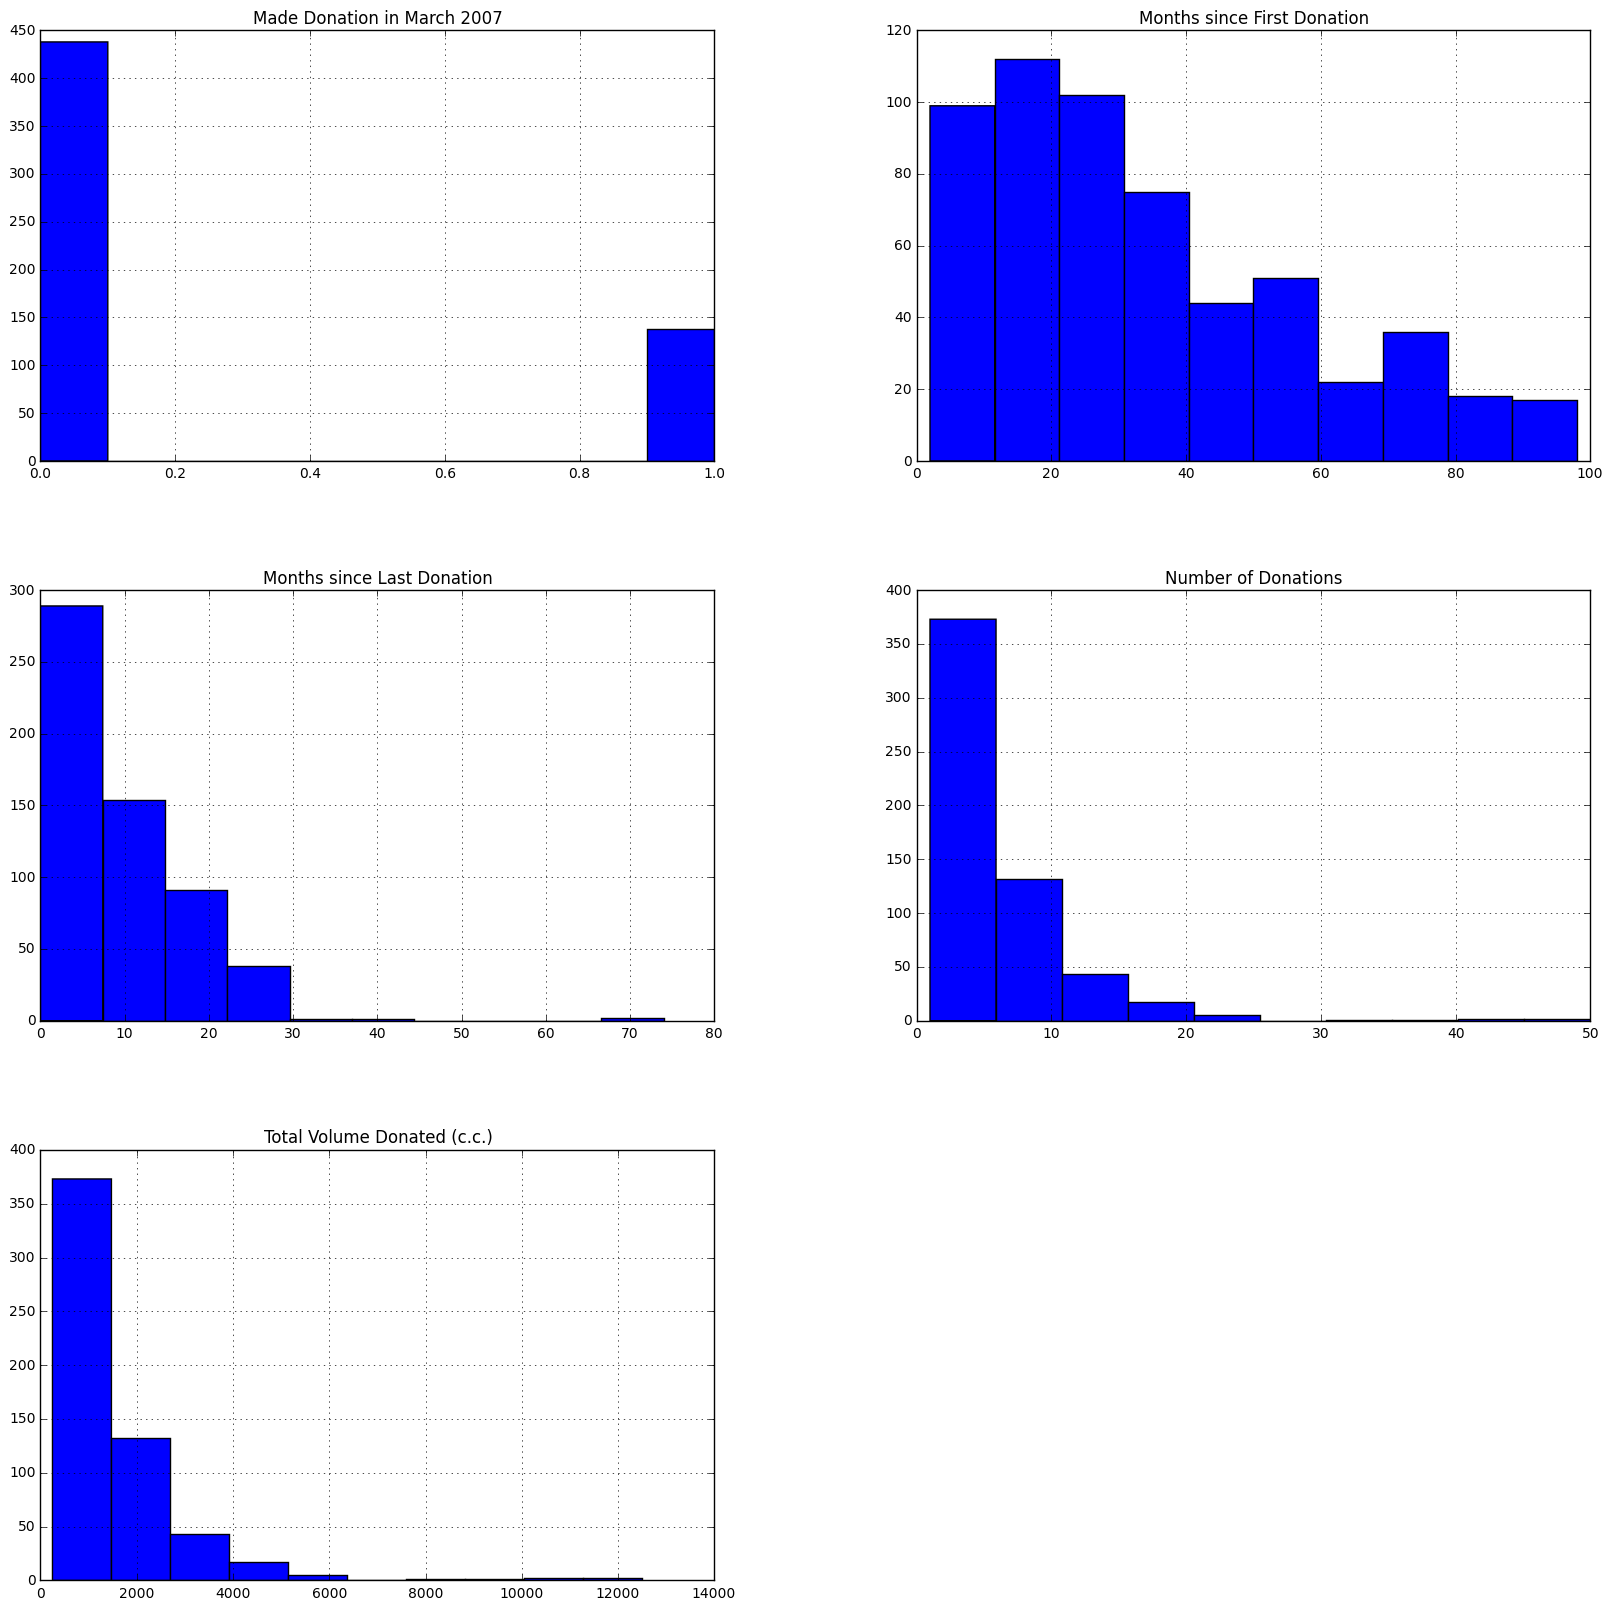

In [6]:
%matplotlib inline
b.hist(figsize=(20,20)) 

In [7]:
b.kurtosis()

Months since Last Donation     11.416687
Number of Donations            18.940493
Total Volume Donated (c.c.)    18.940493
Months since First Donation    -0.192772
Made Donation in March 2007    -0.504993
dtype: float64

In [8]:
b.skew()

Months since Last Donation     2.071107
Number of Donations            3.503331
Total Volume Donated (c.c.)    3.503331
Months since First Donation    0.767706
Made Donation in March 2007    1.223427
dtype: float64

In [73]:
#everything is heavily skewed, well, except months since first donation
#as we have discussed Total Volume Donated (c.c.) is equal to Number of Donations
#in some cases their are major outliers, perhaps we could cap the value at something much lower and set higher values to that
b1 = b[['Months since Last Donation', 'Number of Donations','Months since First Donation',
        'Made Donation in March 2007']]

In [74]:
b1.columns.values

array(['Months since Last Donation', 'Number of Donations',
       'Months since First Donation', 'Made Donation in March 2007'], dtype=object)

In [75]:
b1[b1['Months since Last Donation'] > 30]
#note people with really big last donations it's equal to their first donation, maybe they donated once and then
#were like "I hate this" and never donated again

,Months since Last Donation,Number of Donations,Months since First Donation,Made Donation in March 2007
673,35,3,64,0
350,74,1,74,0
541,39,1,39,0
74,72,1,72,0


In [76]:
b1[(b1['Months since Last Donation']==b1['Months since First Donation'])&(b1['Made Donation in March 2007']==1)]
#.count()

,Months since Last Donation,Number of Donations,Months since First Donation,Made Donation in March 2007
510,4,2,4,1
79,2,1,2,1
550,2,1,2,1
247,2,1,2,1
293,2,1,2,1
111,4,1,4,1
415,4,1,4,1
128,11,1,11,1
601,21,2,21,1
525,21,1,21,1


In [77]:
print float(18)/float(144)

0.125


In [78]:
b1.keys()

Index([u'Months since Last Donation', u'Number of Donations', u'Months since First Donation', u'Made Donation in March 2007'], dtype='object')

In [80]:
b1['Months since Last Donation Outliers Removed'] = b1['Months since Last Donation']
#b1.loc[b1['Months since Last Donation'] > 35, 'Months since Last Donation Outliers Removed'] = 35
b1[b1['Months since Last Donation Outliers Removed'].apply(lambda x: x > 35)] = 35

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead
  app.launch_new_instance()
//anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2002: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
  self._setitem_array(key, value)


In [82]:
b1[b1['Months since Last Donation Outliers Removed'] > 30]

,Months since Last Donation,Number of Donations,Months since First Donation,Made Donation in March 2007,Months since Last Donation Outliers Removed
673,35,3,64,0,35
350,35,35,35,35,35
541,35,35,35,35,35
74,35,35,35,35,35


In [83]:
b1[b1['Number of Donations']>30]

,Months since Last Donation,Number of Donations,Months since First Donation,Made Donation in March 2007,Months since Last Donation Outliers Removed
619,2,50,98,1,2
736,5,46,98,1,5
451,23,38,98,0,23
350,35,35,35,35,35
39,2,43,86,1,2
149,2,44,98,0,2
157,4,33,98,1,4
541,35,35,35,35,35
74,35,35,35,35,35


In [84]:
##okay, need to save this to remember how it works, but sqrt didn't normalize quite as much as I hoped... though way better
b1['Months since Last Donation square root'] = b1['Months since Last Donation'].apply(math.sqrt)
#b1['Months since Last Donation log'] = (b1['Months since Last Donation']+1).apply(numpy.log)
#b1['Months since Last Donation reciprocal'] = 1/(b1['Months since Last Donation']+1)
#oh yea, log and reciprocal won't work well because there are zeroes, would need to add one to all values before proceeding
#cool, so sqrt wins anyway... 

#b1['Number of Donations square root'] = b1['Number of Donations'].apply(math.sqrt)
b1['Number of Donations log'] = (b1['Number of Donations']+1).apply(numpy.log)
#b1['Number of Donations reciprocal'] = 1/(b1['Number of Donations']+1)
#log wins here

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ee7b450>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1108b4dd0>]], dtype=object)

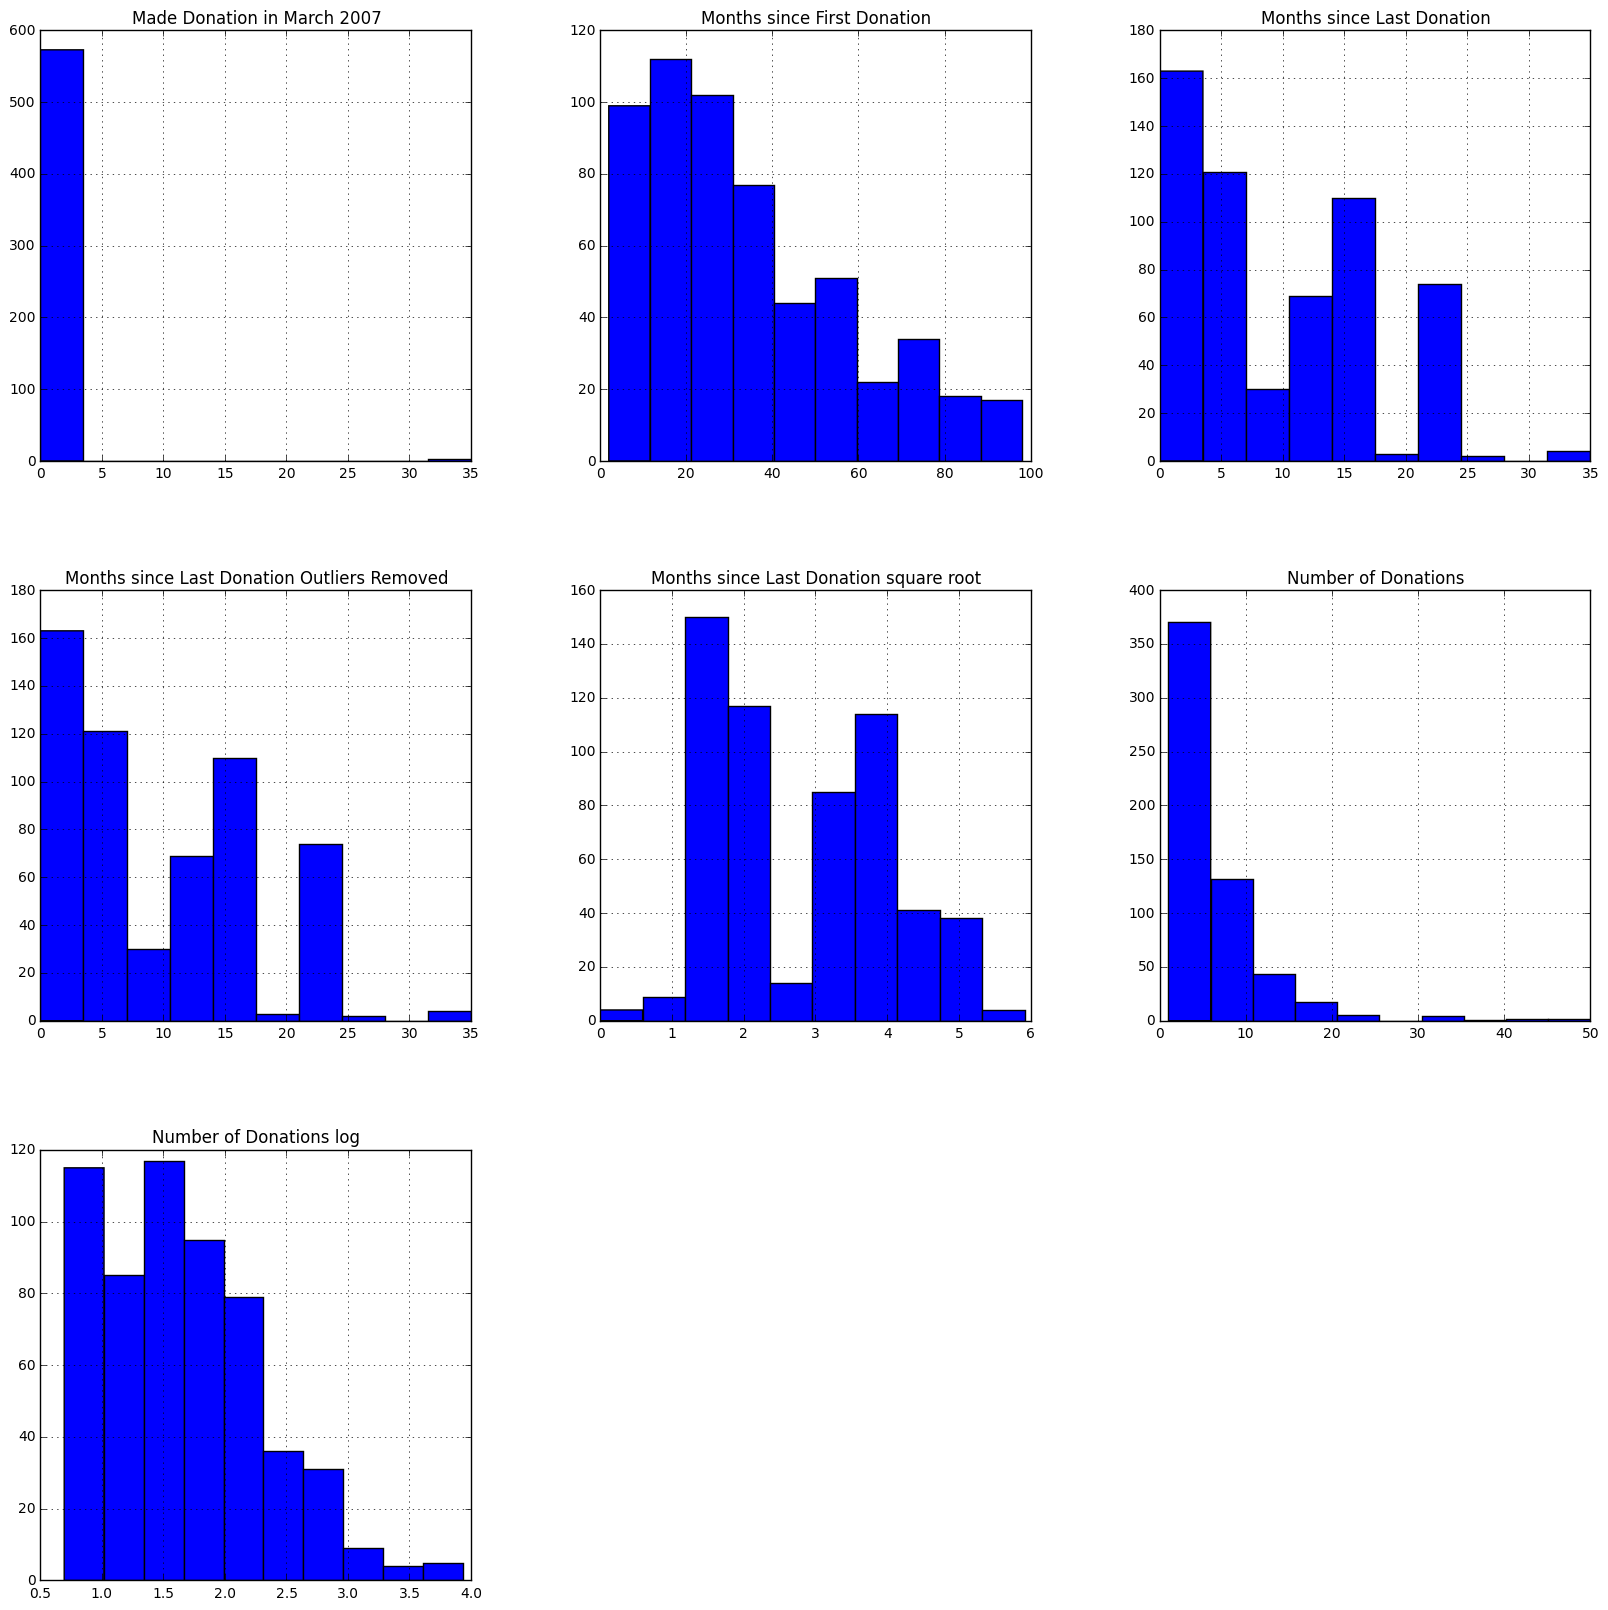

In [85]:
b1.hist(figsize=(20,20))

In [35]:
print "SKEW"
print b1.skew()
print ""
print "KURTOSIS"
print b1.kurtosis()

SKEW
Months since Last Donation                2.071107
Number of Donations                       3.503331
Months since First Donation               0.767706
Made Donation in March 2007               1.223427
Months since Last Donation square root    0.473504
Months since Last Donation log           -0.017768
Months since Last Donation reciprocal     1.804491
Number of Donations square root           1.324227
Number of Donations log                   0.446914
Number of Donations reciprocal            0.565099
dtype: float64

KURTOSIS
Months since Last Donation                11.416687
Number of Donations                       18.940493
Months since First Donation               -0.192772
Made Donation in March 2007               -0.504993
Months since Last Donation square root     0.009060
Months since Last Donation log            -1.164577
Months since Last Donation reciprocal      7.208174
Number of Donations square root            3.076228
Number of Donations log                   -0

In [87]:
#also, is there a way to get odds ratios or percent liklihood from logistic regression in python? there is in R so it seems likely...
b1.keys()

Index([u'Months since Last Donation', u'Number of Donations', u'Months since First Donation', u'Made Donation in March 2007', u'Months since Last Donation Outliers Removed', u'Months since Last Donation square root', u'Number of Donations log'], dtype='object')

In [91]:
b2 = b1[['Months since Last Donation square root', 'Number of Donations log', 'Months since First Donation', 'Made Donation in March 2007']]

In [92]:
b2[:5]

,Months since Last Donation square root,Number of Donations log,Months since First Donation,Made Donation in March 2007
619,1.414214,3.931826,98,1
664,0.000000,2.639057,28,1
441,1.000000,2.833213,35,1
160,1.414214,3.044522,45,1
358,1.000000,3.218876,77,0


In [93]:
b2.keys()

Index([u'Months since Last Donation square root', u'Number of Donations log', u'Months since First Donation', u'Made Donation in March 2007'], dtype='object')

In [115]:
pred = b2[['Months since Last Donation square root', 'Number of Donations log', 'Months since First Donation']]
outcomes = b2[['Made Donation in March 2007']]
fit1 = linear_model.LinearRegression()


In [116]:
fit1.fit(pred, outcomes)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [123]:
fit2 = linear_model.LogisticRegression()
fit2.fit(pred, outcomes)

//anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:125: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [124]:
fit2.coef_

array([[ 0.39904087, -1.52652661,  0.03191948],
       [-0.50392514,  1.26153452, -0.02496144],
       [ 0.19841362,  1.10095884, -0.10540523]])

In [134]:
v= pd.DataFrame(fit2.predict_proba(pred))


In [135]:
v.describe()

,0,1,2
count,576.000000,576.000000,576.000000
mean,0.747075,0.240565,0.012360
std,0.168531,0.164891,0.013311
min,0.181219,0.016706,0.000015
25%,0.642032,0.098341,0.001474
50%,0.784059,0.208179,0.008041
75%,0.889752,0.342651,0.019475
max,0.983279,0.804975,0.075066


In [136]:
v[:5]

,0,1,2
0,0.341588,0.658363,0.000049
1,0.181219,0.804975,0.013806
2,0.240820,0.748908,0.010272
3,0.275784,0.719214,0.005002
4,0.392988,0.606828,0.000184
